In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras

In [2]:
#Leer el archivo
df = pd.read_csv("house.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Separar variables y etiquetas
x = df[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat'
        ,'long','sqft_living15','sqft_lot15']].values
y = df[['price']].values

# Estandarizar los datos
scaler = StandardScaler()
scaler2 = StandardScaler()
x = scaler.fit_transform(x)
y = scaler2.fit_transform(y.reshape(-1,1))


In [4]:
#Dividir conjunto de datos 1. Probar y 2. Entrenar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 41)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 18) (17290, 1)
(4323, 18) (4323, 1)


In [5]:

# Crear el modelo de red neuronal con una neurona en la capa de salida
model = keras.Sequential([
    keras.layers.Dense(18, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(99, activation='relu'),
    keras.layers.Dense(369, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(999, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Una neurona con activación sigmoid
])
print(model.summary())

model.compile(loss = "mae",optimizer = "adam", metrics = ["mae"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 99)                1881      
                                                                 
 dense_2 (Dense)             (None, 369)               36900     
                                                                 
 dense_3 (Dense)             (None, 500)               185000    
                                                                 
 dense_4 (Dense)             (None, 999)               500499    
                                                                 
 dense_5 (Dense)             (None, 1)                 1000      
                                                                 
Total params: 725,622
Trainable params: 725,622
Non-trai

In [6]:
#Entrenar el modelo.
history = model.fit(X_train, y_train, epochs = 25)

Epoch 1/25
541/541 [==============================] - 5s 6ms/step - loss: 0.5793 - mae: 0.5793
Epoch 2/25
541/541 [==============================] - 3s 6ms/step - loss: 0.5132 - mae: 0.5132
Epoch 3/25
541/541 [==============================] - 3s 5ms/step - loss: 0.5071 - mae: 0.5071
Epoch 4/25
541/541 [==============================] - 3s 5ms/step - loss: 0.5028 - mae: 0.5028
Epoch 5/25
541/541 [==============================] - 3s 5ms/step - loss: 0.5006 - mae: 0.5006
Epoch 6/25
541/541 [==============================] - 3s 5ms/step - loss: 0.4985 - mae: 0.4985
Epoch 7/25
541/541 [==============================] - 3s 6ms/step - loss: 0.4968 - mae: 0.4968
Epoch 8/25
541/541 [==============================] - 3s 6ms/step - loss: 0.4953 - mae: 0.4953
Epoch 9/25
541/541 [==============================] - 3s 6ms/step - loss: 0.4941 - mae: 0.4941
Epoch 10/25
541/541 [==============================] - 3s 6ms/step - loss: 0.4936 - mae: 0.4936
Epoch 11/25
541/541 [============================

<Axes: >

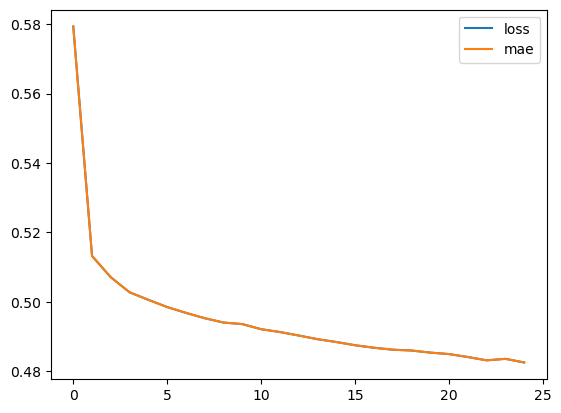

In [8]:
values=pd.DataFrame(history.history)
values.plot()

In [9]:
#Evaluar el modelo y ver su presición y saber si es confiable.
sample = X_test[4, :]
prediction = model.predict(np.expand_dims(sample,axis=0))


print(prediction-y_test[4])

1/1 [==============================] - 0s 194ms/step
[[0.64152175]]
